# Programación Python para Machine Learning.

## Autor: Victor Simo Lozano

## Actividad 13
<p>Deep Learning I.</p>
    

<hr style="border-color:red">

- Instala adecuadamente las bibliotecas para Deep Learning TensorFlow y Keras. Si dispones de GPU, trata de realizar la instalación teniendo en cuenta ese aspecto. Comprueba mediante un script que la instalación ha sido completada de manera correcta.

- Carga el conjunto de datos MNIST que trae la propia biblioteca Keras:
    - Diseña, implementa y prueba un modelo de Red Neuronal Profunda (DNN) que trate de resolver este problema de clasificación multiclase de imágenes.


In [1]:
# Generales 
from pandas import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from IPython.display import clear_output
import warnings

warnings.filterwarnings('ignore')

<div style="font-size:14px; text-align:justify"><b>PRIMERA PARTE.-</b><br></div>

<div style="font-size:14px; text-align:justify"><b>1: </b>Instala las bibliotecas para Deep Learning Tensorflow y Keras.</div>

In [3]:
# !pip install tensorflow-gpu
# clear_output()

In [4]:
import tensorflow as tf
from tensorflow import keras

In [5]:
!pip show keras

Name: keras
Version: 2.6.0
Summary: TensorFlow Keras.
Home-page: https://keras.io/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: /opt/conda/lib/python3.7/site-packages
Requires: 
Required-by: tensorflow


In [6]:
!pip show tensorflow

Name: tensorflow
Version: 2.6.4
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: /opt/conda/lib/python3.7/site-packages
Requires: absl-py, astunparse, clang, flatbuffers, gast, google-pasta, grpcio, h5py, keras, keras-preprocessing, numpy, opt-einsum, protobuf, six, tensorboard, tensorflow-estimator, termcolor, typing-extensions, wheel, wrapt
Required-by: explainable-ai-sdk, tensorflow-cloud, tensorflow-decision-forests, tensorflow-io, tensorflow-serving-api, tensorflow-transform, tfx-bsl, witwidget


Comprobar si esta disponible el uso de GPU para Tensorflow.

In [7]:
tf.test.is_gpu_available()

2022-10-13 19:28:37.046289: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-10-13 19:28:37.106526: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-13 19:28:37.195914: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-13 19:28:37.197072: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA 

True

In [8]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)
    print("Name:", gpu.name, "  Type:", gpu.device_type)

Name: /physical_device:GPU:0   Type: GPU


2022-10-13 19:28:39.278595: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-13 19:28:39.279466: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-13 19:28:39.280101: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero


<div style="font-size:14px; text-align:justify"><b>SEGUNDA PARTE.-</b><br></div>

<div style="font-size:14px; text-align:justify"><b>2: </b>Carga el conjunto de datos MNIST que trae la propia biblioteca Keras.</div>

***Fuente:*** *# https://keras.io/examples/vision/mnist_convnet/*

In [9]:
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# Load the data and split it between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

11501568/11490434 [==============================] - 0s 0us/step
x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


<div style="font-size:14px; text-align:justify"><b>2.1.: </b>Diseña, implementa y prueba un modelo de Red Neuronal Profunda (DNN) que trate de resolver este problema de clasificación multiclase de imágenes.</div>

Primeramente, se crea el modelo con la clase **Sequential**. Con ello, almacenaremos en un contenerdor todo el numero de capas y las caracteristicas de estas.

In [10]:
from tensorflow.keras import layers

# Instancia de clase "Sequential" que almacene las capas de la red neuronal. Definiendo alguna de ellas en su instancia
model=keras.Sequential([
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),    
])

# Añadir las capas de la red neuronal con el metodo "add"
model.add(layers.Dense(num_classes, activation='softmax'),)

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dropout (Dropout)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                1

2022-10-13 19:28:40.881245: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-13 19:28:40.882179: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-13 19:28:40.882832: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-13 19:28:40.883512: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-13 19:28:40.884131: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from S

Mediante el metodo **compile**, se configurará el modelo para el entrenamiento que despues será ejecutado con la instrucción **fit**.

In [11]:
# Modelo de entrenamiento
model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy']
             )

# Entrenamiento del modelo
batch_size = 128
epochs = 15

epochs_history=model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

2022-10-13 19:28:41.873460: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/15


2022-10-13 19:28:43.070565: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


422/422 [==============================] - 9s 5ms/step - loss: 0.3573 - accuracy: 0.8952 - val_loss: 0.0861 - val_accuracy: 0.9755
Epoch 2/15
422/422 [==============================] - 2s 4ms/step - loss: 0.1106 - accuracy: 0.9666 - val_loss: 0.0590 - val_accuracy: 0.9852
Epoch 3/15
422/422 [==============================] - 2s 4ms/step - loss: 0.0842 - accuracy: 0.9742 - val_loss: 0.0493 - val_accuracy: 0.9855
Epoch 4/15
422/422 [==============================] - 2s 5ms/step - loss: 0.0701 - accuracy: 0.9786 - val_loss: 0.0403 - val_accuracy: 0.9882
Epoch 5/15
422/422 [==============================] - 2s 4ms/step - loss: 0.0617 - accuracy: 0.9806 - val_loss: 0.0382 - val_accuracy: 0.9888
Epoch 6/15
422/422 [==============================] - 2s 4ms/step - loss: 0.0550 - accuracy: 0.9828 - val_loss: 0.0343 - val_accuracy: 0.9910
Epoch 7/15
422/422 [==============================] - 2s 4ms/step - loss: 0.0509 - accuracy: 0.9842 - val_loss: 0.0342 - val_accuracy: 0.9907
Epoch 8/15
422/42

Test loss: 0.024397820234298706
Test accuracy: 0.9915000200271606


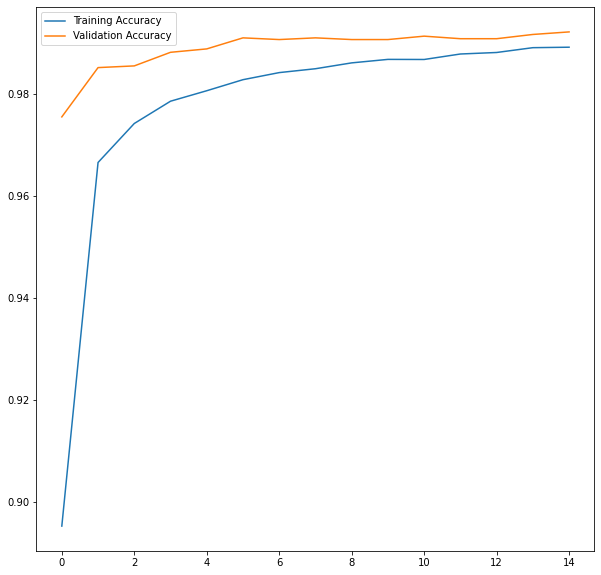

In [12]:
# Evaluacion del modelo
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

# Grafica de evolucion
result_df=pd.DataFrame(epochs_history.history)
result_df['epoch']=epochs_history.epoch

fig, ax= plt.subplots(figsize=(10,10))
num_epochs=result_df.shape[0]
ax.plot(np.arange(0, num_epochs), result_df['accuracy'], label='Training Accuracy')
ax.plot(np.arange(0, num_epochs), result_df['val_accuracy'], label='Validation Accuracy')

ax.legend()
plt.show()